In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
plt.rcParams["text.usetex"] = True

## 8.6

In [2]:
df = pd.DataFrame()
df["x1"] = [108.28, 152.36, 95.04, 65.45, 62.97, 263.99, 265.19, 285.06, 92.01, 165.68]
df["x2"] = [17.05, 16.59, 10.91, 14.14, 9.52, 25.33, 18.54, 15.73, 8.1, 11.13]
x_bar = df.mean().values
s = df.cov(ddof=1).values

In [3]:
eig = np.linalg.eigh(s)
print(eig)

(array([  13.83750662, 7488.80605449]), array([[ 0.04065165, -0.99917338],
       [-0.99917338, -0.04065165]]))


In [4]:
print(eig[0][1]/(eig[0][0] + eig[0][1]))

0.9981556492050405


In [5]:
eig[1][1][1]

-0.04065164995723469

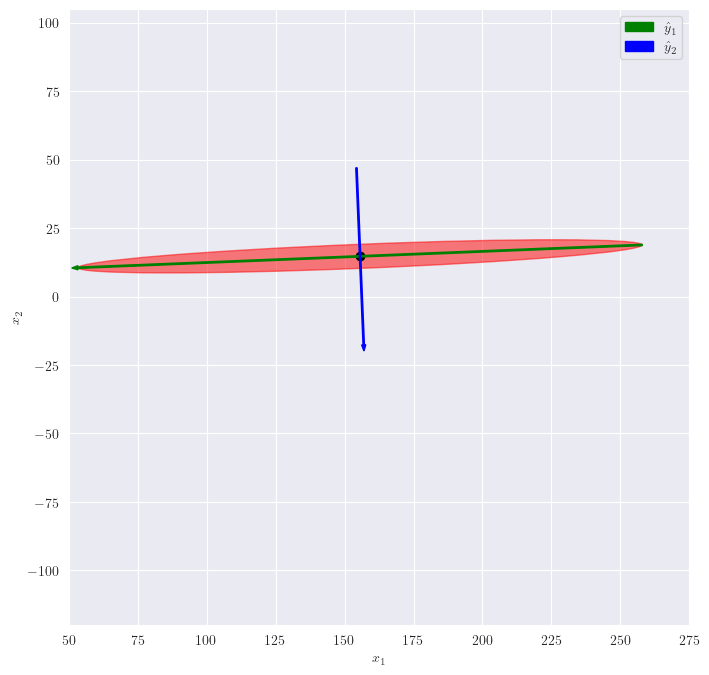

In [7]:
c2 = 1.4
ell = Ellipse(xy=(x_bar[0], x_bar[1]), width=2*np.sqrt(c2 * eig[0][1]), height=2*np.sqrt(c2 * eig[0][0]), angle=np.rad2deg(np.arctan(eig[1][1][1]/eig[1][1][0])))
ell.set_facecolor('red')
ell.set_edgecolor('red')
ell.set_alpha(0.5)
fig, ax = plt.subplots(figsize=(8, 8))
ax.add_artist(ell)
ax.scatter(x_bar[0], x_bar[1], color='k')
ax.arrow(x_bar[0] + np.sqrt(c2 * eig[0][1]),
         x_bar[1] + eig[1][1][1]/eig[1][1][0] * np.sqrt(c2 * eig[0][1]),
         - 2 * np.sqrt(c2 * eig[0][1]),
         - 2 * eig[1][1][1]/eig[1][1][0] * np.sqrt(c2 * eig[0][1]),
         color='g', width=0.5,
         label=r"$\hat{y}_1$")
ax.arrow(x_bar[0] - np.sqrt(eig[0][0]/8),
         x_bar[1] - eig[1][0][1]/eig[1][0][0] * np.sqrt(eig[0][0]/8),
         2 * np.sqrt(eig[0][0]/8),
         2 * eig[1][0][1]/eig[1][0][0] * np.sqrt(eig[0][0]/8),
         color='b', width=0.5,
         label=r"$\hat{y}_2$")
ax.set_xlim(50, 275)
ax.set_ylim(-120, 105)
ax.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.savefig('./figure/8.6c.pdf')

In [ ]:
print(eig[1][1][0] * np.sqrt(eig[0][1]/7476.45))
print(eig[1][1][1] * np.sqrt(eig[0][1]/26.19))

## 8.22

In [ ]:
bull = pd.read_csv('./data/T1-10.dat', sep='\s+', header=None,
                   names=['Breed', 'SalePr', 'YrHgt', 'FtFrBody', 'PrctFFB', 'Frame', 'BkFat', 'SaleHt', 'SaleWt'])

In [ ]:
bull_target = bull[['YrHgt', 'FtFrBody', 'PrctFFB', 'Frame', 'BkFat', 'SaleHt', 'SaleWt']]

In [ ]:
s = bull_target.cov(ddof=1).values
r = bull_target.apply(lambda x: (x - x.mean())/x.std(ddof=1), axis=0).cov(ddof=1).values

In [ ]:
eig_s = np.linalg.eigh(s)
eig_s_sort = np.sort(eig_s[0])[::-1]
eigvec_s_sort = eig_s[1][np.argsort(eig_s[0])[::-1]]
eig_r = np.linalg.eigh(r)
eig_r_sort = np.sort(eig_r[0])[::-1]
eigvec_r_sort = eig_r[1][np.argsort(eig_r[0])[::-1]]

In [ ]:
print(eig_s_sort)

In [ ]:
print(eigvec_s_sort)

In [ ]:
print(eig_r_sort)

In [ ]:
print(eigvec_r_sort)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(np.arange(1, 8), eig_s_sort, marker='o')
ax[0].set_xlabel('$i$')
ax[0].set_ylabel('$\hat{\lambda}_i$')
ax[0].set_title("Scree Plot for $\mathbf{S}$")
ax[1].plot(np.arange(1, 8), eig_r_sort, marker='o')
ax[1].set_xlabel('$i$')
ax[1].set_ylabel('$\hat{\lambda}_i$')
ax[1].set_title("Scree Plot for $\mathbf{R}$")
plt.savefig('./figure/8.22a.pdf')

In [ ]:
bull["y1_s"] = eigvec_s_sort[:, 0] @ bull_target.T
bull["y1_r"] = eigvec_r_sort[:, 0] @ bull_target.T
bull["y2_s"] = eigvec_s_sort[:, 1] @ bull_target.T
bull["y2_r"] = eigvec_r_sort[:, 1] @ bull_target.T

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.scatterplot(
    ax=ax[0], data=bull,
    x='y2_s', y='y1_s',
    hue='Breed', palette='Set2',
)
ax[0].set_title("Scatter Plot for $\mathbf{S}$")
sns.scatterplot(
    ax=ax[1], data=bull,
    x='y2_r', y='y1_r',
    hue='Breed', palette='Set2',
)
ax[1].set_title("Scatter Plot for $\mathbf{R}$")
plt.savefig('./figure/8.22d.pdf')

In [ ]:
from scipy import stats

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
qq = stats.probplot(bull['y1_s'], dist='norm', plot=ax[0])
ax[0].set_title("Q-Q Plot for $\mathbf{S}$")
qq2 = stats.probplot(bull['y1_r'], dist='norm', plot=ax[1])
ax[1].set_title("Q-Q Plot for $\mathbf{R}$")
plt.savefig('./figure/8.22e.pdf')